## Normal Ensembling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import metrics

In [2]:
data = pd.read_csv("Data_1.csv")
data.head()

,GC,HV,TP,IP
0,50,0.2,1.88,4.172152
1,70,0.2,2.44,4.601111
2,100,0.2,2.38,8.166500
3,200,0.2,3.04,15.996800
4,300,0.2,3.54,20.152300


In [3]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=51)
print(f"train_set: {len(train_set)} \ntest_set: {len(test_set)}\n")

train_set: 140 
test_set: 35



In [4]:
train_set_x = np.asanyarray(train_set[['IP', 'TP', 'GC']])
train_set_y = np.asanyarray(train_set[['HV']])


In [5]:
test_set_x = np.asanyarray(test_set[['IP', 'TP', 'GC']])
test_set_y = np.asanyarray(test_set[['HV']])

In [6]:
from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
model= DecisionTreeRegressor()
#model = RandomForestRegressor()

In [7]:
model.fit(train_set_x, train_set_y)
model.score(test_set_x, test_set_y)

0.3512931034482757

In [8]:
train_preds = model.predict(train_set_x)
test_preds = model.predict(test_set_x)


In [9]:
train_mae = metrics.mean_absolute_error(train_set_y, train_preds)
test_mae = metrics.mean_absolute_error(test_set_y, test_preds)

train_mse = metrics.mean_squared_error(train_set_y, train_preds)
test_mse = metrics.mean_squared_error(test_set_y, test_preds)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = metrics.r2_score(train_set_y, train_preds)
test_r2 = metrics.r2_score(test_set_y, test_preds)

print(f"Training MAE: {train_mae:.3f}, Test MAE: {test_mae:.3f}")
print(f"Training MSE: {train_mse:.3f}, Test MSE: {test_mse:.3f}")
print(f"Training RMSE: {train_rmse:.3f}, Test RMSE: {test_rmse:.3f}")
print(f"Training R²: {train_r2:.3f}, Test R²: {test_r2:.3f}")

Training MAE: 0.000, Test MAE: 0.071
Training MSE: 0.000, Test MSE: 0.012
Training RMSE: 0.000, Test RMSE: 0.111
Training R²: 1.000, Test R²: 0.351


In [10]:
from sklearn.metrics import r2_score
y_hat = model.predict(test_set[['IP', 'TP', 'GC']])

print("Residual sum of squares: %.3f"
      % np.mean((y_hat - test_set_y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % model.score(test_set_x, test_set_y))
print("R2-score: %.3f" % r2_score(test_set_y, y_hat))

Residual sum of squares: 0.042
Variance score: 0.351
R2-score: 0.351


C:\Users\prajj\anaconda3\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [11]:
# View the default hyperparameters of the XGBoost model
print("Model Hyperparameters:", model.get_params())

Model Hyperparameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


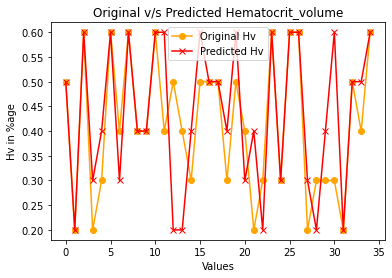

In [12]:
import matplotlib.pyplot as plt
plt.plot(test_set_y, 'orange', label = "Original Hv", marker='o')
plt.plot(y_hat, 'red', label = "Predicted Hv", marker = 'x')
plt.title("Original v/s Predicted Hematocrit_volume")
plt.xlabel('Values')
plt.ylabel('Hv in %age')
plt.legend()
plt.show()

In [13]:
import numpy as np

# Assuming 'y_test' are the actual values and 'y_pred' are the predicted values
y_test = np.array([test_set_y])  # Replace with actual test set
y_pred = np.array([y_hat])  # Replace with your model's predictions

# Margin of Deviation
margin_of_deviation = np.abs(y_test - y_pred)

# Relative Error (in percentage)
relative_error = (margin_of_deviation / y_test) * 100

# Print results
print("Margin of Deviation:", margin_of_deviation)
print("Relative Error (%):", relative_error)

#average
print("Average value of Margin of Deviation:", np.mean(margin_of_deviation))
print("Average value of Relative Error (%):", np.mean(relative_error))

Margin of Deviation: [[[0.  0.3 0.1 ... 0.  0.  0.1]
  [0.3 0.  0.4 ... 0.3 0.3 0.4]
  [0.1 0.4 0.  ... 0.1 0.1 0. ]
  ...
  [0.  0.3 0.1 ... 0.  0.  0.1]
  [0.1 0.2 0.2 ... 0.1 0.1 0.2]
  [0.1 0.4 0.  ... 0.1 0.1 0. ]]]
Relative Error (%): [[[  0.          60.          20.         ...   0.           0.
    20.        ]
  [150.           0.         200.         ... 150.         150.
   200.        ]
  [ 16.66666667  66.66666667   0.         ...  16.66666667  16.66666667
     0.        ]
  ...
  [  0.          60.          20.         ...   0.           0.
    20.        ]
  [ 25.          50.          50.         ...  25.          25.
    50.        ]
  [ 16.66666667  66.66666667   0.         ...  16.66666667  16.66666667
     0.        ]]]
Average value of Margin of Deviation: 0.1630204081632653
Average value of Relative Error (%): 47.83401360544218


## K-Fold Cross-Validation

Cross-Validated R²: 0.50 ± 0.18
Cross-Validated MSE: 0.01 ± 0.00
Cross-Validated RMSE: 0.09 ± 0.01
R2 scores for each fold: [0.70756376 0.67799009 0.51086957 0.22039859 0.39655172]
Mean R2 score: 0.503
Mean Squared Error for each fold: [-0.00542857 -0.00742857 -0.01114286 -0.00914286 -0.01228571]
Mean MSE: -0.009


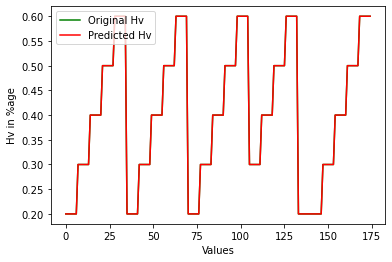

R2-score on the entire dataset: 1.000


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Load data
data = pd.read_csv("Data_1.csv")

# Define feature and target variables
X = data[['IP', 'TP', 'GC']]
y = data['HV']

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
#model = RandomForestRegressor()
model = DecisionTreeRegressor()

# Perform k-fold cross-validation
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# For R-squared Error
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# For mean squared error
# Convert negative MSE to positive MSE
mse_scores = -mse_scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

# for Root mean squared error
cv_rmse_scores = np.sqrt(mse_scores)
mean_rmse = np.mean(cv_rmse_scores)
std_rmse = np.std(cv_rmse_scores)

print(f'Cross-Validated R²: {mean_r2:.2f} ± {std_r2:.2f}')
print(f'Cross-Validated MSE: {mean_mse:.2f} ± {std_mse:.2f}')
print(f'Cross-Validated RMSE: {mean_rmse:.2f} ± {std_rmse:.2f}')
# Output the results
print(f"R2 scores for each fold: {r2_scores}")
print(f"Mean R2 score: {r2_scores.mean():.3f}")
print(f"Mean Squared Error for each fold: {-mse_scores}")
print(f"Mean MSE: {-mse_scores.mean():.3f}")

# Train the model on the entire training set for final evaluation
model.fit(X, y)
y_pred = model.predict(X)

# Plot original vs predicted values
plt.plot(y.values, 'g', label="Original Hv")
plt.plot(y_pred, 'r', label="Predicted Hv")
plt.xlabel('Values')
plt.ylabel('Hv in %age')
plt.legend()
plt.show()

# Print R2 score for the whole dataset
print("R2-score on the entire dataset: %.3f" % r2_score(y, y_pred))


## Confidence Interval 

In [15]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import metrics


data = pd.read_csv("Data_1.csv")
# Step 2: Normalize the Data

X = data.drop('HV', axis=1)
y = data['HV']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of bootstrap samples
n_iterations = 1000
n_size = int(len(X_train) * 0.8)

# Arrays to store bootstrap predictions
bootstrap_preds = np.zeros((n_iterations, len(X_test)))

# Perform bootstrapping
for i in range(n_iterations):
    # Resample the data
    X_resample, y_resample = resample(X_train, y_train, n_samples=n_size, random_state=i)
    
    # Train model
    model = RandomForestRegressor()
    #model = DecisionTreeRegressor()
    model.fit(X_resample, y_resample)
    
    # Predict on the test set
    bootstrap_preds[i, :] = model.predict(X_test)

# Calculate the mean and standard deviation of the predictions
mean_preds = np.mean(bootstrap_preds, axis=0)
std_preds = np.std(bootstrap_preds, axis=0)

# Define confidence level
confidence_level = 0.95
z_score = 1.96  # For 95% confidence

# Calculate the confidence intervals
lower_bound = mean_preds - z_score * std_preds
upper_bound = mean_preds + z_score * std_preds

# Print the confidence intervals for the first 5 test predictions
for i in range(5):
    print(f"Prediction: {mean_preds[i]:.2f}, Confidence Interval: [{lower_bound[i]:.2f}, {upper_bound[i]:.2f}]")


Prediction: 0.29, Confidence Interval: [0.21, 0.38]
Prediction: 0.24, Confidence Interval: [0.20, 0.29]
Prediction: 0.56, Confidence Interval: [0.51, 0.62]
Prediction: 0.56, Confidence Interval: [0.50, 0.62]
Prediction: 0.27, Confidence Interval: [0.19, 0.34]


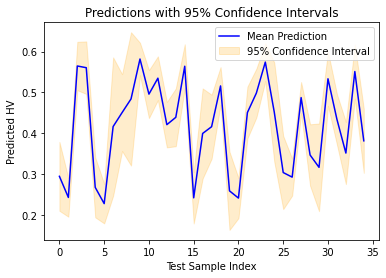

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(range(len(mean_preds)), mean_preds, 'b', label='Mean Prediction')
plt.fill_between(range(len(mean_preds)), lower_bound, upper_bound, color='orange', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Test Sample Index')
plt.ylabel('Predicted HV')
plt.title('Predictions with 95% Confidence Intervals')
plt.legend()
plt.show()